### Data Preparation:

- ##### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import simplefilter
simplefilter('ignore')

- ##### Load and Explore dataset

In [2]:
raw_data = pd.read_csv('dataset.csv')
data =raw_data.copy()
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
string_col = data.select_dtypes('object').columns
data[string_col] = data[string_col].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    string 
dtypes: float64(4), string(1)
memory usage: 6.0 KB


In [9]:
data.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

In [10]:
data.duplicated().sum()

3

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data[data.duplicated()]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class


In [13]:
data.Class.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Class, dtype: Int64

In [14]:
# encoding categorical features
data.Class = data.Class.map({'Iris-versicolor': 1, 'Iris-virginica': 2, 'Iris-setosa': 3})
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3


### Exploratory Data Analysis (EDA):

- #### correlation matrix

Text(0.5, 1.0, 'Correlation Heatmap')

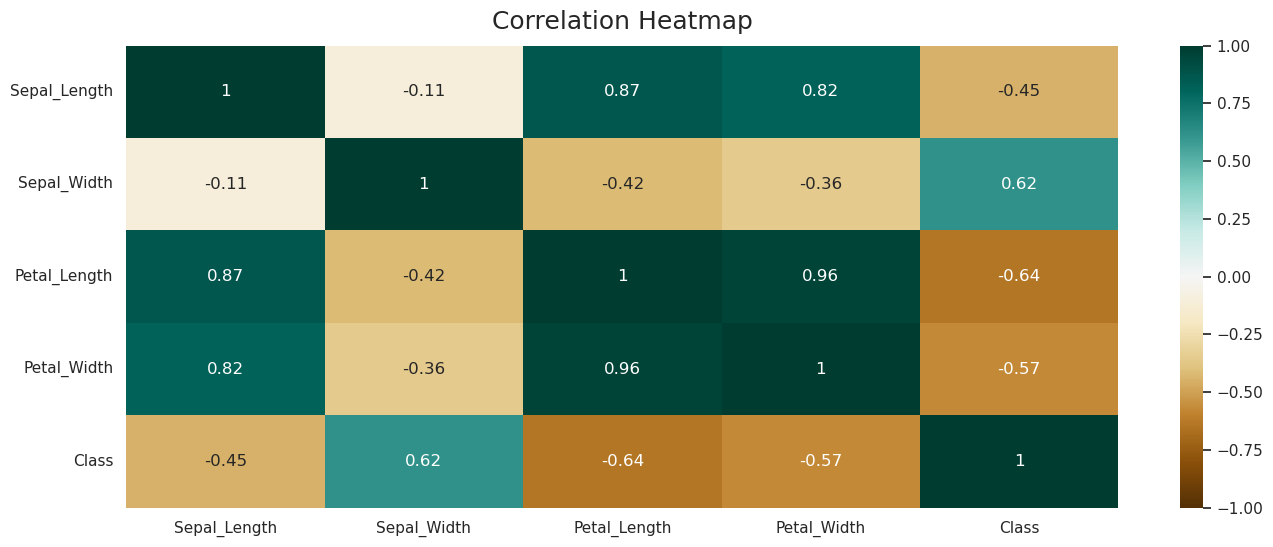

In [15]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

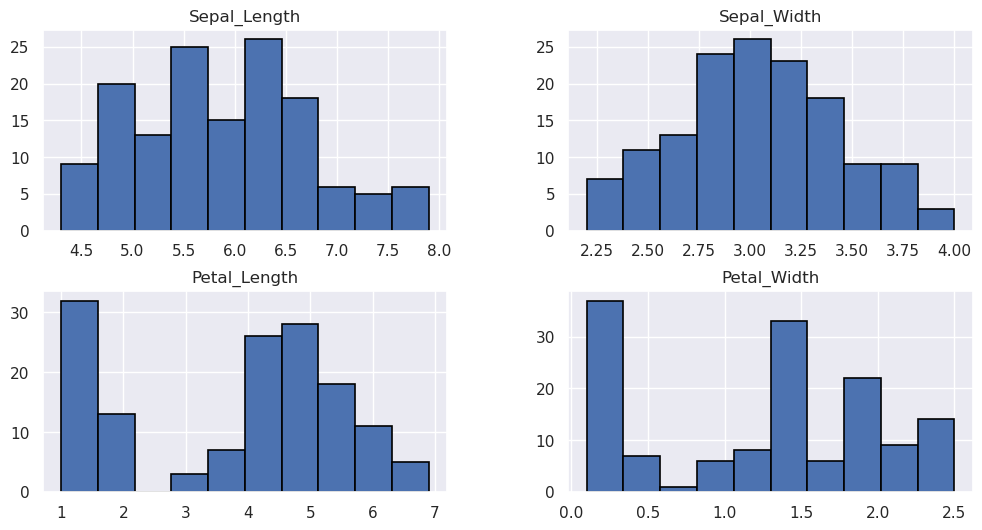

In [99]:
# Now let us see how are the length and width are distributed

data.iloc[:,:-1].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Sepal_Width'>

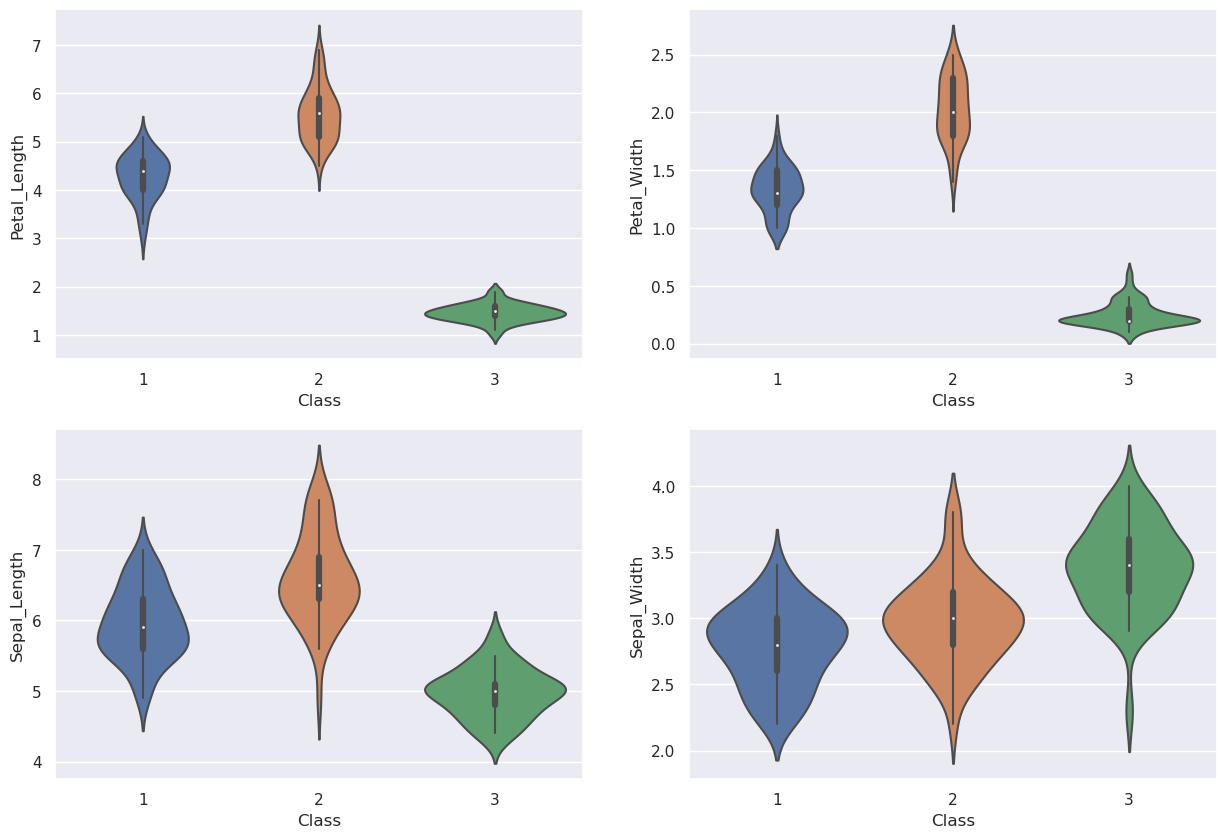

In [102]:
# Now let us see how the length and width vary according to the species

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x = 'Class',y = 'Petal_Length',data = data)
plt.subplot(2,2,2)
sns.violinplot(x = 'Class',y = 'Petal_Width',data = data)
plt.subplot(2,2,3)
sns.violinplot(x = 'Class',y = 'Sepal_Length',data = data)
plt.subplot(2,2,4)
sns.violinplot(x = 'Class',y = 'Sepal_Width',data = data)

[]

<Figure size 1000x600 with 0 Axes>

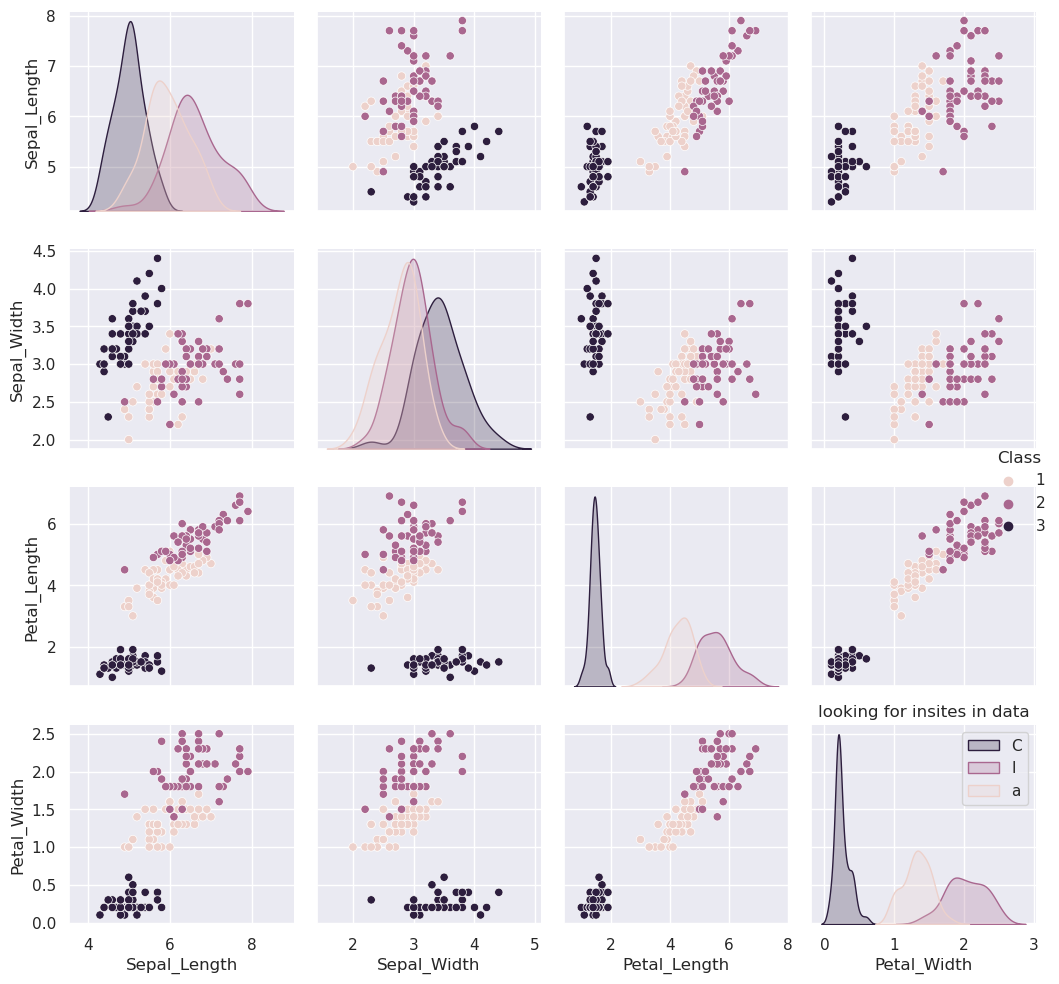

In [16]:
# miultiple pairwise bivariate distributions
plt.figure(figsize = (10,6))
sns.pairplot(data, hue = 'Class')
plt.title('looking for insites in data')
plt.legend('Class')
plt.tight_layout()
plt.plot()


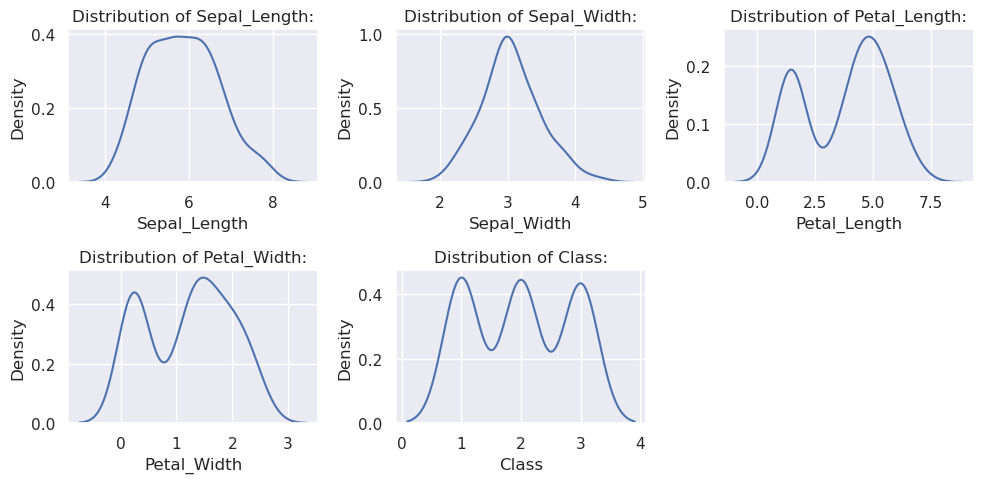

In [19]:
# Distribution of the data
plt.figure(figsize = (10, 5))
for i, col in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    plt.title(f'Distribution of {col}:')
    sns.kdeplot(data[col])
    plt.tight_layout()
    plt.plot()

In [21]:
# using box plot to see outliers
import plotly.express as px
fig = px.box(data, y = 'Sepal_Length')
fig.show()

In [22]:
import plotly.express as px
fig = px.box(data, y = 'Petal_Length')
fig.show()

In [23]:
import plotly.express as px
fig = px.box(data, y = 'Sepal_Width')
fig.show()

In [24]:
import plotly.express as px
fig = px.box(data, y = 'Petal_Width')
fig.show()

In [31]:
# removing outliers from Sepal_Width column
data[data.Sepal_Width < 2.2]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
60,5.0,2.0,3.5,1.0,1


In [32]:
data[data.Sepal_Width > 4]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
15,5.7,4.4,1.5,0.4,3
32,5.2,4.1,1.5,0.1,3
33,5.5,4.2,1.4,0.2,3


In [33]:
data = data[data.Sepal_Width <= 4]
data[data.Sepal_Width > 4]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class


In [34]:
data = data[data.Sepal_Width >= 2.2]
data[data.Sepal_Width < 2.2]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class


### Feature Selection:

- ##### Data Scaling

In [36]:
inputs = data.iloc[:, :-1]
target = data.iloc[:, -1]

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_inputs = scale.fit_transform(inputs)

- ##### ANOVA test

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif

best_features = SelectKBest(score_func = f_classif, k = 'all')
fit = best_features.fit(scale_inputs, target)

feature_score = pd.DataFrame(data=fit.scores_, index=list(inputs.columns), columns=['ANOVA Score'])
feature_score.sort_values(ascending=False, by='ANOVA Score')

,ANOVA Score
Petal_Length,1083.608074
Petal_Width,879.485505
Sepal_Length,119.311913
Sepal_Width,42.292570


### Modeling:

- we will implement logistic regression , distance based algorithms (k-NN, SVM) and tree based algorithms (Desicion tree, Random forest)
- inputs -> for tree based algorithms (before apply scaling)
- scale_inputs -> for non tree based algorithms (after applying scaling)

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
def model(classifier):

    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test, y_pred)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'accuracy').mean()))

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def model_evaluation(classifier):

    cm = confusion_matrix(y_test, classifier.predict(x_test))
    print('confusion_matrix is :')
    print(cm)
    print('\n classification report:')
    print(classification_report(y_test, classifier.predict(x_test)))

- ##### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scale_inputs, target, stratify = target, test_size = 0.2, random_state = 0)

In [64]:
lr = LogisticRegression(random_state = 0)
model(lr)

Accuracy :  96.55%
Cross Validation Score :  95.61%


In [69]:
model_evaluation(lr)

confusion_matrix is :
[[ 9  1  0]
 [ 0 10  0]
 [ 0  0  9]]

 classification report:
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00         9

    accuracy                           0.97        29
   macro avg       0.97      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



- ##### Support Vector machine

In [70]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'rbf', random_state = 0)
model(svc_model)

Accuracy :  100.00%
Cross Validation Score :  95.61%


- HyperParameter tuning

In [80]:
from sklearn.model_selection import GridSearchCV
svc_model = SVC()
tuning_params = np.linspace(0.01,100,100)
tuning_params = [round(i,2) for i in tuning_params]
parameters = [{
    'C': tuning_params,
    'gamma': tuning_params,
    'kernel': ['rbf', 'linear']
}]
gsv = GridSearchCV(svc_model, param_grid=parameters, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0), scoring = 'accuracy',
                   verbose=True, n_jobs=-1)
best_gsv = gsv.fit(x_train, y_train)
print(best_gsv.best_params_)

Fitting 15 folds for each of 20000 candidates, totalling 300000 fits
{'C': 8.09, 'gamma': 0.01, 'kernel': 'linear'}


In [73]:
svc_model = SVC(kernel = 'linear', gamma = 0.01, C = 8.09, random_state = 0)
model(svc_model)

Accuracy :  93.10%
Cross Validation Score :  96.77%


In [74]:
model_evaluation(svc_model)

confusion_matrix is :
[[ 8  2  0]
 [ 0 10  0]
 [ 0  0  9]]

 classification report:
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00         9

    accuracy                           0.93        29
   macro avg       0.94      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29



- ##### K-NN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# calculating the accuracy of the models with different of K
mean_acc = np.zeros(10)
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_test, y_hat)
mean_acc

array([0.89655172, 0.86206897, 0.86206897, 0.89655172, 0.93103448,
       1.        , 0.96551724, 0.93103448, 0.96551724, 0.96551724])

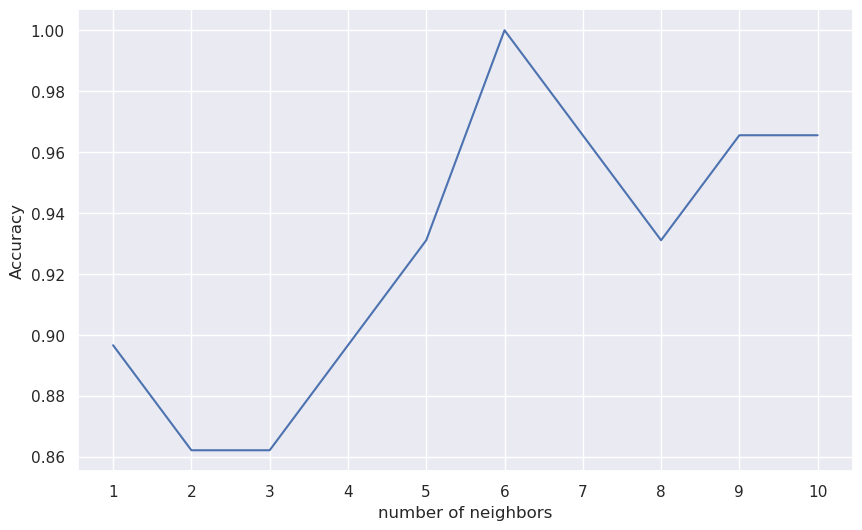

In [77]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), mean_acc)
plt.xticks(np.arange(1, 11, 1.0))
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier()
parameters = [{
    'n_neighbors': np.arange(6,15,1),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}]
gsv = GridSearchCV(knn_model, param_grid=parameters, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0),scoring = 'accuracy',
                   verbose=True, n_jobs=-1)
best_gsv = gsv.fit(x_train, y_train)

In [79]:
best_gsv.best_params_

{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}

In [81]:
knn_model = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 6, weights = 'distance')
model(knn_model)


Accuracy :  93.10%
Cross Validation Score :  96.50%


In [82]:
model_evaluation(knn_model)

confusion_matrix is :
[[ 8  2  0]
 [ 0 10  0]
 [ 0  0  9]]

 classification report:
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00         9

    accuracy                           0.93        29
   macro avg       0.94      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29



- ##### decision tree

In [85]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, stratify = target, test_size = 0.2, random_state = 0)

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
model(dt_model)

Accuracy :  96.55%
Cross Validation Score :  93.85%


In [91]:
tree_model = DecisionTreeClassifier()
parameters = [{
    'max_depth': np.arange(2,21,1),
    'min_samples_leaf': np.arange(5,100,5),
    'criterion': ['gini', 'entropy']
}]
gsv = GridSearchCV(tree_model, param_grid=parameters, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0),
                   verbose=True, n_jobs=-1)
best_gsv = gsv.fit(x_train, y_train)

Fitting 15 folds for each of 722 candidates, totalling 10830 fits


In [92]:
best_gsv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 0, criterion = 'gini', min_samples_leaf = 10, max_depth = 2)
model(dt_model)

Accuracy :  93.10%
Cross Validation Score :  93.85%


- ##### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()
parameters = [{
    'n_estimators': [5,20,30,40,50,100],
    'max_depth': np.arange(10,121,10),
    'min_samples_leaf': np.arange(1,20,2),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}]
gsv = GridSearchCV(random_model, param_grid=parameters, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0),scoring = 'accuracy',
                   verbose=True, n_jobs=-1)
best_gsv = gsv.fit(x_train, y_train)
print(best_gsv.best_params_)

Fitting 15 folds for each of 2880 candidates, totalling 43200 fits
{'bootstrap': True, 'max_depth': 120, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'n_estimators': 5}


In [95]:
rf = RandomForestClassifier(n_estimators = 5, min_samples_leaf = 7, max_features = 'sqrt', max_depth = 120, bootstrap = True, random_state = 0)
model(rf)

Accuracy :  93.10%
Cross Validation Score :  95.03%


### Alogrithm Results Table :


|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score|
|-|-|-|-|
|1|Logistic Regression|96.55%|95.61%|
|2|Support Vector Classifier|93.10%|96.77%|
|3|Decision Tree Classifier|93.10%|93.85%|
|4|Random Forest Classifier|93.10%|95.03%|
|5|K-Nearest Neighbors Classfier|93.10%|96.50%|

### Prediction

In [118]:
prediction = lr.predict(scale.transform([[5.6, 3.0, 4.5, 1.5]]))
if prediction[0] == 1:
    print('predicted : Iris-versicolor')
elif prediction[0] == 2:
    print('predicted : Iris-virginica')
elif prediction[0] == 3:
    print('predicted : Iris-setosa')

predicted : Iris-versicolor


In [119]:
prediction = lr.predict(scale.transform([[6.7, 3.0, 5.2, 2.3]]))
if prediction[0] == 1:
    print('predicted : Iris-versicolor')
elif prediction[0] == 2:
    print('predicted : Iris-virginica')
elif prediction[0] == 3:
    print('predicted : Iris-setosa')

predicted : Iris-virginica


- thank you